### BERT Model Creation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import spacy
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from nltk.tokenize import RegexpTokenizer, word_tokenize
import re

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GRU, Input, Flatten, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input, Embedding, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
from numpy import load

In [21]:
X_train_bvect = load('../data/X_train_bvect.npy')
X_test_bvect = load('../data/X_test_bvect.npy')

In [22]:
X_train_reshape = X_train_bvect.reshape(-1,768,1)
X_test_reshape = X_test_bvect.reshape(-1,768,1)

In [23]:
y_train_cat = load('../data/y_train_cat.npy')
y_test_cat = load('../data/y_test_cat.npy')

In [27]:
model_l = Sequential()

model_l.add(Conv1D(32, 7, activation = 'relu'))
model_l.add(MaxPooling1D())
model_l.add(Bidirectional(LSTM(24)))
model_l.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model_l.add(Dropout(0.5))
model_l.add(Dense(64,activation='relu',kernel_regularizer=l2(0.001)))
model_l.add(Dropout(0.5))
model_l.add(Dense(32,activation='relu',kernel_regularizer=l2(0.001)))

model_l.add(Dense(1,activation='sigmoid'))

In [28]:
model_l.compile(optimizer='nadam', metrics=['accuracy'], loss='binary_crossentropy')

In [29]:
history_l = model_l.fit(X_train_reshape, y_train_cat, validation_data=(X_test_reshape,y_test_cat), epochs=75)

Epoch 1/75
1500/1500 [==============================] - 186s 124ms/step - loss: 0.5554 - accuracy: 0.7723 - val_loss: 0.4604 - val_accuracy: 0.8054
Epoch 2/75
1500/1500 [==============================] - 175s 117ms/step - loss: 0.4299 - accuracy: 0.8250 - val_loss: 0.3925 - val_accuracy: 0.8363
Epoch 3/75
1500/1500 [==============================] - 178s 119ms/step - loss: 0.3885 - accuracy: 0.8418 - val_loss: 0.3783 - val_accuracy: 0.8442
Epoch 4/75
1500/1500 [==============================] - 179s 119ms/step - loss: 0.3778 - accuracy: 0.8455 - val_loss: 0.4050 - val_accuracy: 0.8325
Epoch 5/75
1500/1500 [==============================] - 178s 119ms/step - loss: 0.3716 - accuracy: 0.8468 - val_loss: 0.3641 - val_accuracy: 0.8467
Epoch 6/75
1500/1500 [==============================] - 174s 116ms/step - loss: 0.3642 - accuracy: 0.8523 - val_loss: 0.3556 - val_accuracy: 0.8508
Epoch 7/75
1500/1500 [==============================] - 174s 116ms/step - loss: 0.3565 - accuracy: 0.8549 - val_

In [31]:
model_l.save('../data/model_l.hd')

INFO:tensorflow:Assets written to: ../data/model_l.hd\assets


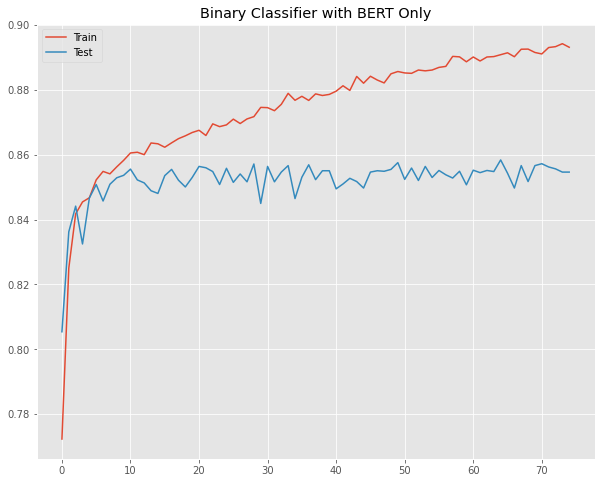

In [36]:
plt.figure(figsize=(10,8))
plt.plot(history_l.history['accuracy'], label='Train')
plt.plot(history_l.history['val_accuracy'], label='Test')
plt.title('Binary Classifier with BERT Only')
plt.legend()